In [97]:
import numpy as np
import pandas as pd


dfin = pd.read_csv('../NNNormalizeDataIn.csv',header=None)  #inputs 128 lines per sample
dfout = pd.read_csv('../NNNormalizeDataOutClassses.csv',header=None)  #output classes 

#dfin=dfin.drop(dfin.columns[0], axis=1)
#dfin=dfin.drop(dfin.columns[0], axis=1)
#dfin=dfin.drop(dfin.columns[0], axis=1)
#dfin=dfin.drop(dfin.columns[0], axis=1)
#dfin=dfin.drop(dfin.columns[0], axis=1)




total_inputs,total_output = dfin.as_matrix().astype(np.float32),dfout.as_matrix().astype(np.int32)



total_inputs = np.reshape(total_inputs, (-1,128,9))




/home/rjpg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [98]:
print(dfin)
total_inputs


               0         1         2         3         4         5         6  \
0       0.170886 -0.167826 -0.245107 -0.005307  0.101389  1.000000  0.198721   
1       1.000000  0.167323  0.110276  0.311909  0.202092  1.000000  0.198721   
2      -0.162225  0.334897  0.386039  0.332821  0.938606  0.906729  0.198721   
3      -0.495336 -0.335400 -0.390785 -0.071983 -0.576161  0.906729  0.198721   
4       0.670553 -0.670549 -0.776116  0.063416 -0.266649  0.906729  0.198721   
5       0.837109 -0.670549  0.143952  0.534065  0.329141  0.906729  0.298681   
6       0.837109 -0.335400 -0.288019  0.435163  0.155403  0.811554  0.398641   
7       0.670553 -0.335400  0.318937  0.315971  0.295242  0.716380  0.398641   
8       1.000000 -0.670549 -0.282173  0.218423 -0.004525  0.716380  0.398641   
9       1.000000 -0.000251  0.139312  0.269715  0.371859  0.621205  0.498601   
10      0.837109 -0.000251  1.000000  0.472463  0.655945  0.430856  0.498601   
11      0.670553 -0.000251  0.567392  0.

array([[[ 1.7088607e-01, -1.6782573e-01, -2.4510670e-01, ...,
          1.9872051e-01,  3.2241258e-01,  5.9588689e-01],
        [ 1.0000000e+00,  1.6732299e-01,  1.1027586e-01, ...,
          1.9872051e-01,  4.5077366e-01,  5.0246048e-01],
        [-1.6222519e-01,  3.3489737e-01,  3.8603857e-01, ...,
          1.9872051e-01,  3.7737539e-01,  3.8321662e-01],
        ...,
        [ 4.3304465e-03, -2.5136155e-04, -4.0739995e-01, ...,
          9.8760493e-02,  1.7321697e-01,  3.5674417e-01],
        [ 4.3304465e-03, -2.5136155e-04, -4.6310234e-01, ...,
          9.8760493e-02,  2.4600889e-01,  3.4299701e-01],
        [-3.2878080e-01, -2.5136155e-04, -4.4819331e-01, ...,
          9.8760493e-02,  9.8892011e-02,  3.4476128e-01]],

       [[-1.6222519e-01,  1.6732299e-01, -7.6619469e-02, ...,
          1.0000000e+00,  4.4855726e-01,  5.4358482e-01],
        [ 1.7088607e-01,  1.0000000e+00, -6.3030732e-01, ...,
          1.0000000e+00,  4.3982789e-01,  5.0699884e-01],
        [ 3.3744171e-01, 

In [99]:
total_output

array([[4],
       [0],
       [2],
       ...,
       [1],
       [2],
       [1]], dtype=int32)

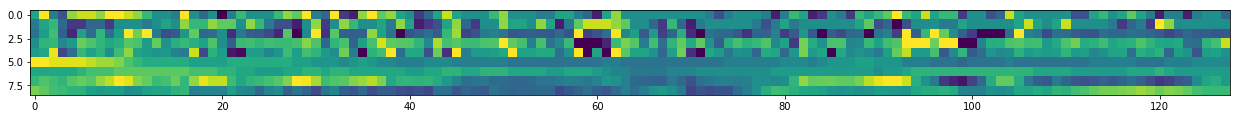

In [100]:
import matplotlib.pyplot as plt
n=1
plt.figure(figsize=(128,9))
for i in range(n):
    # display original
    ax = plt.subplot(5, 1, i+1)
    plt.imshow(total_inputs[i].T)
    #plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
plt.show()


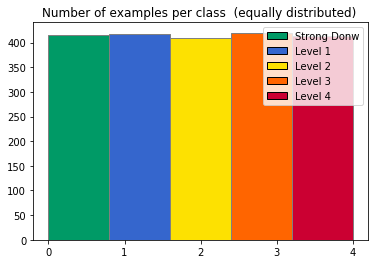

In [101]:
counts, bins, patches= plt.hist(total_output, bins=5, edgecolor='gray') 
plt.title("Number of examples per class  (equally distributed) ")
patches[0].set_facecolor('#FFFFFF')
patches[1].set_facecolor('#CCCCCC')
patches[2].set_facecolor('#888888')
patches[3].set_facecolor('#444444')
patches[4].set_facecolor('#000000')




#create legend
from matplotlib.patches import Rectangle
l0 = '#FFFFFF'
l1 = '#CCCCCC'
l2 = '#888888'
l3 = '#444444'
l4 = '#000000'

#Alarm Color
l0 = '#009a66'
l1 = '#3566cd'
l2 = '#fde101'
l3 = '#ff6500'
l4 = '#cb0032'

patches[0].set_facecolor(l0)
patches[1].set_facecolor(l1)
patches[2].set_facecolor(l2)
patches[3].set_facecolor(l3)
patches[4].set_facecolor(l4)

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [l0,l1,l2,l3,l4]]
labels= ["Strong Donw","Level 1", "Level 2","Level 3","Level 4"]
plt.legend(handles, labels)

y = [0,1,2,3,4]
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))
#plt.xticks(ticker.FormatStrFormatter('%0.1f'))
plt.xticks(y)
plt.savefig('histo-target-co2-classes-number.svg')
plt.show()

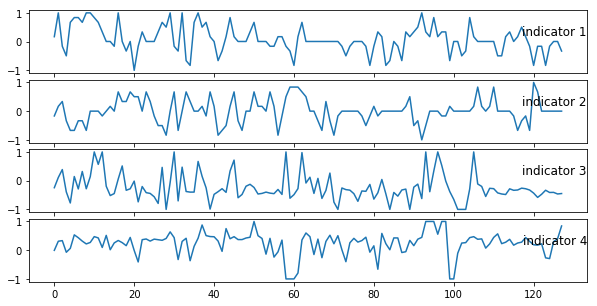

In [102]:
from matplotlib import pyplot
groups = [0, 1, 2, 3]#, 4]#,5,6,7,8]
values=total_inputs[0]
i=1
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 0.1)
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:,group])
	pyplot.title("indicator "+str(i), y=0.5, loc='right')
	i += 1
    
pyplot.savefig('inputaschart.pdf')

pyplot.show()

In [103]:
import tensorflow as tf
from keras import backend as K
from keras.optimizers import Adam
from keras.utils import np_utils

NB_EPOCH = 200
# network and training
BATCH_SIZE = 64
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 128, 9 # input image dimensions
NB_CLASSES = 5  # number of outputs = number of classes
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

y_train = np_utils.to_categorical(total_output, NB_CLASSES)



In [104]:
y_train

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [105]:
total_output

array([[4],
       [0],
       [2],
       ...,
       [1],
       [2],
       [1]], dtype=int32)

In [110]:
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau


sess = tf.Session()
K.set_session(sess)

#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		#model.add(InputLayer())
		# CONV => RELU => POOL
		# kernel size (width, height) default (2,5)
		model.add(Conv2D(20, kernel_size=(16,4), padding="same", strides=(2, 1),
			input_shape=input_shape))
                         #,batch_input_shape=(64,1, 5, 7)))
		model.add(Activation("relu"))
		model.add(Dropout(0.50))
		# pool size - down scale int factor (vertical, horizontal)
		#model.add(MaxPooling2D(pool_size=(4, 1), strides=(2, 1)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=(16,4), padding="same",  strides=(2, 1)))
		model.add(Activation("relu"))
		model.add(Dropout(0.50))
		#model.add(MaxPooling2D(pool_size=(4, 1), strides=(2, 1))) #1,2
		model.summary()
		model.add(Dropout(0.60))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(400))
		model.add(Activation("relu"))
		model.add(Dropout(0.7))
		model.add(Dense(150))
		model.add(Activation("relu"))
		model.add(Dropout(0.8))
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		#model.add(Dropout(0.3)) # not logical to do droput on last layer with softmax 
		return model

    
K.set_image_dim_ordering("th")


In [111]:
X_train = total_inputs[:, np.newaxis, :, :]

In [112]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 20, 64, 9)         1300      
_________________________________________________________________
activation_31 (Activation)   (None, 20, 64, 9)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 20, 64, 9)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 32, 9)         64050     
_________________________________________________________________
activation_32 (Activation)   (None, 50, 32, 9)         0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 50, 32, 9)         0         
Total params: 65,350
Trainable params: 65,350
Non-trainable params: 0
_________________________________________________________________
______

In [115]:
sess.run(tf.global_variables_initializer())


tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
esCallBack = EarlyStopping(monitor='val_acc', min_delta=0, patience=12, verbose=0, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=400, 
		verbose=1, # 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.
		validation_split=VALIDATION_SPLIT, callbacks=[tbCallBack])#,reduce_lr,esCallBack])



Train on 1660 samples, validate on 415 samples
Epoch 1/400
1660/1660 [==============================] - 1s 321us/step - loss: 1.6618 - acc: 0.1946 - val_loss: 1.6092 - val_acc: 0.2072
Epoch 2/400
1660/1660 [==============================] - 1s 321us/step - loss: 1.6133 - acc: 0.1970 - val_loss: 1.6098 - val_acc: 0.1807
Epoch 3/400
1660/1660 [==============================] - 1s 330us/step - loss: 1.6097 - acc: 0.1958 - val_loss: 1.6103 - val_acc: 0.1687
Epoch 4/400
1660/1660 [==============================] - 1s 332us/step - loss: 1.6098 - acc: 0.2012 - val_loss: 1.6107 - val_acc: 0.1687
Epoch 5/400
1660/1660 [==============================] - 1s 338us/step - loss: 1.6102 - acc: 0.2139 - val_loss: 1.6107 - val_acc: 0.1687
Epoch 6/400
1660/1660 [==============================] - 1s 337us/step - loss: 1.6087 - acc: 0.2108 - val_loss: 1.6108 - val_acc: 0.1687
Epoch 7/400
1660/1660 [==============================] - 1s 345us/step - loss: 1.6119 - acc: 0.1922 - val_loss: 1.6105 - val_acc: 0

1660/1660 [==============================] - 1s 328us/step - loss: 1.6103 - acc: 0.2018 - val_loss: 1.6100 - val_acc: 0.1687
Epoch 61/400
1660/1660 [==============================] - 1s 330us/step - loss: 1.6108 - acc: 0.2060 - val_loss: 1.6102 - val_acc: 0.1663
Epoch 62/400
1660/1660 [==============================] - 1s 329us/step - loss: 1.6105 - acc: 0.2127 - val_loss: 1.6102 - val_acc: 0.1663
Epoch 63/400
1660/1660 [==============================] - 1s 329us/step - loss: 1.6097 - acc: 0.2024 - val_loss: 1.6104 - val_acc: 0.1663
Epoch 64/400
1660/1660 [==============================] - 1s 337us/step - loss: 1.6105 - acc: 0.1952 - val_loss: 1.6105 - val_acc: 0.1663
Epoch 65/400
1660/1660 [==============================] - 1s 329us/step - loss: 1.6078 - acc: 0.2114 - val_loss: 1.6105 - val_acc: 0.1639
Epoch 66/400
1660/1660 [==============================] - 1s 332us/step - loss: 1.6092 - acc: 0.2078 - val_loss: 1.6112 - val_acc: 0.1687
Epoch 67/400
1660/1660 [=======================

1660/1660 [==============================] - 1s 326us/step - loss: 1.5921 - acc: 0.2416 - val_loss: 1.6035 - val_acc: 0.2145
Epoch 120/400
1660/1660 [==============================] - 1s 324us/step - loss: 1.5766 - acc: 0.2476 - val_loss: 1.6026 - val_acc: 0.2217
Epoch 121/400
1660/1660 [==============================] - 1s 323us/step - loss: 1.5917 - acc: 0.2313 - val_loss: 1.6029 - val_acc: 0.2120
Epoch 122/400
1660/1660 [==============================] - 1s 328us/step - loss: 1.5890 - acc: 0.2416 - val_loss: 1.6038 - val_acc: 0.2072
Epoch 123/400
1660/1660 [==============================] - 1s 322us/step - loss: 1.5893 - acc: 0.2446 - val_loss: 1.6053 - val_acc: 0.2024
Epoch 124/400
1660/1660 [==============================] - 1s 321us/step - loss: 1.5803 - acc: 0.2476 - val_loss: 1.6039 - val_acc: 0.2096
Epoch 125/400
1660/1660 [==============================] - 1s 326us/step - loss: 1.5799 - acc: 0.2494 - val_loss: 1.6035 - val_acc: 0.2120
Epoch 126/400
1660/1660 [================

1660/1660 [==============================] - 1s 333us/step - loss: 1.5101 - acc: 0.3108 - val_loss: 1.6065 - val_acc: 0.2096
Epoch 179/400
1660/1660 [==============================] - 1s 331us/step - loss: 1.5251 - acc: 0.3193 - val_loss: 1.6055 - val_acc: 0.2024
Epoch 180/400
1660/1660 [==============================] - 1s 335us/step - loss: 1.5007 - acc: 0.3283 - val_loss: 1.6051 - val_acc: 0.2096
Epoch 181/400
1660/1660 [==============================] - 1s 331us/step - loss: 1.5023 - acc: 0.3277 - val_loss: 1.6059 - val_acc: 0.2024
Epoch 182/400
1660/1660 [==============================] - 1s 331us/step - loss: 1.5205 - acc: 0.2904 - val_loss: 1.6073 - val_acc: 0.2096
Epoch 183/400
1660/1660 [==============================] - 1s 325us/step - loss: 1.5033 - acc: 0.3211 - val_loss: 1.6093 - val_acc: 0.2120
Epoch 184/400
1660/1660 [==============================] - 1s 325us/step - loss: 1.5139 - acc: 0.3120 - val_loss: 1.6060 - val_acc: 0.2096
Epoch 185/400
1660/1660 [================

1660/1660 [==============================] - 1s 334us/step - loss: 1.3846 - acc: 0.3988 - val_loss: 1.6171 - val_acc: 0.2217
Epoch 238/400
1660/1660 [==============================] - 1s 342us/step - loss: 1.3883 - acc: 0.3916 - val_loss: 1.6181 - val_acc: 0.2241
Epoch 239/400
1660/1660 [==============================] - 1s 343us/step - loss: 1.4040 - acc: 0.3795 - val_loss: 1.6221 - val_acc: 0.2169
Epoch 240/400
1660/1660 [==============================] - 1s 326us/step - loss: 1.3727 - acc: 0.4084 - val_loss: 1.6262 - val_acc: 0.2096
Epoch 241/400
1660/1660 [==============================] - 1s 333us/step - loss: 1.3775 - acc: 0.4133 - val_loss: 1.6256 - val_acc: 0.2048
Epoch 242/400
1660/1660 [==============================] - 1s 334us/step - loss: 1.3921 - acc: 0.4036 - val_loss: 1.6238 - val_acc: 0.2169
Epoch 243/400
1660/1660 [==============================] - 1s 322us/step - loss: 1.4100 - acc: 0.3777 - val_loss: 1.6216 - val_acc: 0.2145
Epoch 244/400
1660/1660 [================

1660/1660 [==============================] - 1s 329us/step - loss: 1.2065 - acc: 0.5018 - val_loss: 1.6412 - val_acc: 0.2169
Epoch 297/400
1660/1660 [==============================] - 1s 337us/step - loss: 1.2304 - acc: 0.4982 - val_loss: 1.6388 - val_acc: 0.2193
Epoch 298/400
1660/1660 [==============================] - 1s 333us/step - loss: 1.1899 - acc: 0.5301 - val_loss: 1.6520 - val_acc: 0.2048
Epoch 299/400
1660/1660 [==============================] - 1s 331us/step - loss: 1.1985 - acc: 0.5012 - val_loss: 1.6504 - val_acc: 0.2000
Epoch 300/400
1660/1660 [==============================] - 1s 328us/step - loss: 1.2312 - acc: 0.4928 - val_loss: 1.6478 - val_acc: 0.2193
Epoch 301/400
1660/1660 [==============================] - 1s 329us/step - loss: 1.2233 - acc: 0.4988 - val_loss: 1.6466 - val_acc: 0.2072
Epoch 302/400
1660/1660 [==============================] - 1s 330us/step - loss: 1.2433 - acc: 0.5048 - val_loss: 1.6432 - val_acc: 0.2120
Epoch 303/400
1660/1660 [================

1660/1660 [==============================] - 1s 330us/step - loss: 1.0501 - acc: 0.5855 - val_loss: 1.6670 - val_acc: 0.2193
Epoch 356/400
1660/1660 [==============================] - 1s 334us/step - loss: 1.0668 - acc: 0.5946 - val_loss: 1.6648 - val_acc: 0.2096
Epoch 357/400
1660/1660 [==============================] - 1s 327us/step - loss: 1.0701 - acc: 0.5892 - val_loss: 1.6654 - val_acc: 0.2072
Epoch 358/400
1660/1660 [==============================] - 1s 331us/step - loss: 1.0269 - acc: 0.6000 - val_loss: 1.6760 - val_acc: 0.2072
Epoch 359/400
1660/1660 [==============================] - 1s 327us/step - loss: 1.0607 - acc: 0.5952 - val_loss: 1.6781 - val_acc: 0.2145
Epoch 360/400
1660/1660 [==============================] - 1s 331us/step - loss: 1.0033 - acc: 0.6217 - val_loss: 1.6824 - val_acc: 0.2193
Epoch 361/400
1660/1660 [==============================] - 1s 322us/step - loss: 1.0095 - acc: 0.6151 - val_loss: 1.6810 - val_acc: 0.2169
Epoch 362/400
1660/1660 [================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


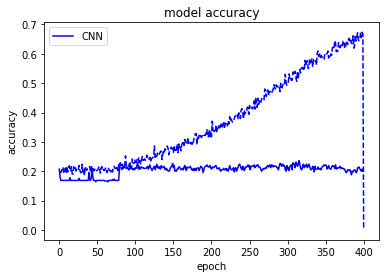

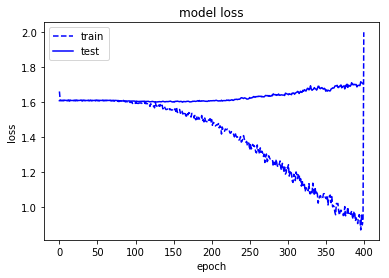

In [116]:
print(history.history.keys())
# summarize history for accuracy
acc=np.array(history.history['acc'])
#acc=acc[0:100]
acc=np.append(acc,[0])
plt.plot(acc,'b--')
plt.plot(history.history['val_acc'],'b',label='CNN')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()
# summarize history for loss
loss=np.array(history.history['loss'])
loss=np.append(loss,[2])
plt.plot(loss,'b--',label='train')
plt.plot(history.history['val_loss'],'b',label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [117]:
from keras.models import Model
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import Bidirectional
from keras.layers import Input

class LSTMNet:
    @staticmethod
    def build(timeSteps,variables,classes):
        #CONV=>POOL
        inputNet = Input(shape=(timeSteps,variables)) #batch_shape=(20, 7, 5) 
       
        lstm=Bidirectional(LSTM(100,recurrent_dropout=0.4,dropout=0.4,return_sequences=True),merge_mode='concat')(inputNet) #worse using stateful=True
        lstm=Bidirectional(LSTM(50,recurrent_dropout=0.4,dropout=0.4),merge_mode='concat')(lstm) #worse using stateful=True 
        
        #lstm=LSTM(100,recurrent_dropout=0.4,dropout=0.4,return_sequences=True)(inputNet) #worse using stateful=True
        #lstm=LSTM(50,recurrent_dropout=0.4,dropout=0.4)(lstm) #worse using stateful=True 
        
        
        #denselayers=Dense(400)(lstm)
        #denselayers=Activation("relu")(denselayers)
        #denselayers=Dropout(0.5)(denselayers)
        #denselayers=Dense(150)(denselayers)
        #denselayers=Activation("relu")(denselayers)
        #denselayers=Dropout(0.8)(denselayers)
        # a softmax classifier
        classificationLayer=Dense(classes,activation='softmax')(lstm)
        #classificationLayer=Activation("softmax")(classificationLayer)
        
        model=Model(inputNet,classificationLayer)
        return model

In [118]:
#dfin=dfin.drop(dfin.columns[0], axis=1)
#dfin=dfin.drop(dfin.columns[0], axis=1)
#dfin=dfin.drop(dfin.columns[0], axis=1)
#dfin=dfin.drop(dfin.columns[0], axis=1)




total_inputs,total_output = dfin.as_matrix().astype(np.float32),dfout.as_matrix().astype(np.int32)



total_inputs = np.reshape(total_inputs, (-1,128,9))

X_trainlstm=total_inputs;


modellstm = LSTMNet.build(timeSteps=128,variables=9,classes=5)

/home/rjpg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [119]:
modellstm.summary()
modellstm.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
    metrics=["accuracy"])


# Prepare saver.
#builder = tf.saved_model.builder.SavedModelBuilder("./model_keras")

# Initialize all variables
sess.run(tf.global_variables_initializer())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128, 9)            0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 128, 200)          88000     
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 100)               100400    
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 505       
Total params: 188,905
Trainable params: 188,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
esCallBack = EarlyStopping(monitor='val_acc', min_delta=0, patience=12, verbose=0, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)



history = modellstm.fit(X_trainlstm, y_train, 
        batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
        verbose=1, # 0 for no logging to stdout, 1 for progress bar logging, 2 for one log line per epoch.
        validation_split=VALIDATION_SPLIT, callbacks=[tbCallBack])#,reduce_lr,esCallBack])

Train on 1660 samples, validate on 415 samples
Epoch 1/200
1660/1660 [==============================] - 23s 14ms/step - loss: 1.6132 - acc: 0.2018 - val_loss: 1.5987 - val_acc: 0.2434
Epoch 2/200
1660/1660 [==============================] - 20s 12ms/step - loss: 1.6004 - acc: 0.2398 - val_loss: 1.5908 - val_acc: 0.2506
Epoch 3/200
1660/1660 [==============================] - 20s 12ms/step - loss: 1.5921 - acc: 0.2482 - val_loss: 1.5778 - val_acc: 0.2747
Epoch 4/200
1660/1660 [==============================] - 20s 12ms/step - loss: 1.5787 - acc: 0.2711 - val_loss: 1.5680 - val_acc: 0.2892
Epoch 5/200
1660/1660 [==============================] - 20s 12ms/step - loss: 1.5742 - acc: 0.2759 - val_loss: 1.5622 - val_acc: 0.2843
Epoch 6/200
1660/1660 [==============================] - 20s 12ms/step - loss: 1.5648 - acc: 0.2729 - val_loss: 1.5592 - val_acc: 0.2747
Epoch 7/200
1660/1660 [==============================] - 20s 12ms/step - loss: 1.5749 - acc: 0.2777 - val_loss: 1.5606 - val_acc: 0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


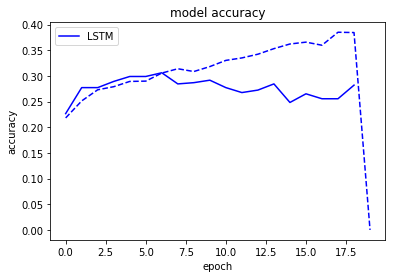

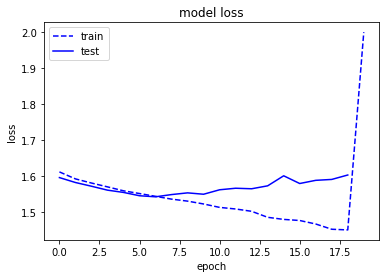

In [57]:
print(history.history.keys())
# summarize history for accuracy
acc=np.array(history.history['acc'])
#acc=acc[0:100]
acc=np.append(acc,[0])
plt.plot(acc,'b--')
plt.plot(history.history['val_acc'],'b',label='LSTM')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()
# summarize history for loss
loss=np.array(history.history['loss'])
loss=np.append(loss,[2])
plt.plot(loss,'b--',label='train')
plt.plot(history.history['val_loss'],'b',label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()